In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [324]:
dataset=pd.read_csv('movierating.csv', encoding='latin-1')
dataset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [325]:
numerical_na=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=="O"]
for feature in numerical_na:
    print("{}:{}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

Year:0.034% missing values
Duration:0.5332% missing values
Genre:0.121% missing values
Votes:0.4893% missing values
Director:0.0339% missing values
Actor 1:0.1043% missing values
Actor 2:0.1537% missing values
Actor 3:0.2027% missing values


In [326]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [327]:
dataset['Rating'].isnull().sum()

7590

In [328]:
features_na=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!="O"]
for feature in features_na:
    print("{}:{}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

Rating:0.4894% missing values


C:\Users\girit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rating', ylabel='Count'>

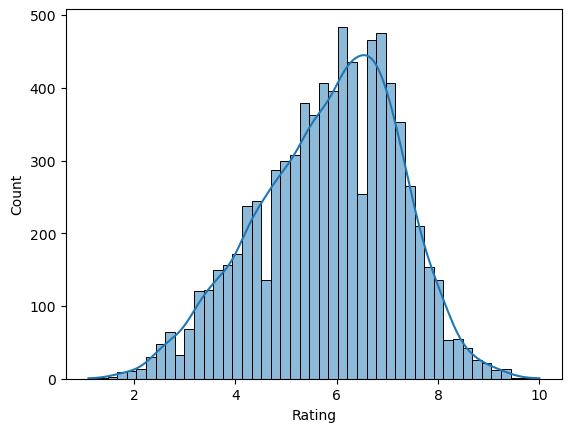

In [329]:
sns.histplot(dataset.Rating,kde=True)

In [330]:
a=dataset['Rating'].median()

In [331]:
a

6.0

In [332]:
def replace_cat_feature(dataset,features_na):
    data=dataset.copy()
    data[features_na]=data[features_na].fillna(a)
    return data
dataset=replace_cat_feature(dataset,features_na)
dataset[features_na].isnull().sum()

Rating    0
dtype: int64

In [333]:
dataset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,6.0,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",6.0,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,6.0,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,6.0,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,6.0,NaN,NaN,NaN,NaN,NaN


In [334]:
dataset['Votes'] = dataset['Votes'].fillna(dataset['Votes'].mode()[0])

In [335]:
dataset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,6.0,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",6.0,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,6.0,8,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,6.0,8,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,6.0,8,NaN,NaN,NaN,NaN


In [336]:
dataset['Duration'] = dataset['Duration'].fillna(dataset['Duration'].mode()[0])

In [337]:
dataset['Year'] = dataset['Year'].fillna(dataset['Year'].mode()[0])

In [338]:
dataset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,(2019),120 min,Drama,6.0,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",6.0,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,6.0,8,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),120 min,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),120 min,Action,6.0,8,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),120 min,Action,6.0,8,NaN,NaN,NaN,NaN


In [339]:
dataset.Year.value_counts()

Year
(2019)    938
(2021)    392
(2018)    381
(2017)    360
(2005)    346
         ... 
(1917)      1
(1913)      1
(1926)      1
(1914)      1
(1924)      1
Name: count, Length: 102, dtype: int64

In [340]:
for i in dataset.columns:
    categorical_column = dataset[i]
    encoded_column = label_encoder.fit_transform(categorical_column)
    dataset[i] = encoded_column

In [341]:
dataset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0,98,20,299,46,1849,1926,2250,800,3108
1,1,98,9,299,56,1849,1548,3280,4790,527
2,2,100,172,351,46,1849,5123,3713,2866,3450
3,3,98,10,228,30,1169,3319,2917,1504,4020
4,7,89,5,299,46,1849,385,3112,3462,405
...,...,...,...,...,...,...,...,...,...,...
15504,13832,67,20,0,32,368,2690,2586,4299,4262
15505,13834,78,29,40,31,1687,2499,227,4532,519
15506,13835,84,20,0,46,1849,2424,3609,4891,4820
15507,13836,67,20,0,46,1849,5938,4718,4891,4820


In [342]:
x=dataset.drop('Rating',axis=1)

In [343]:
y=dataset['Rating']

In [344]:
from sklearn.model_selection import train_test_split

In [345]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [346]:
from sklearn.linear_model import LinearRegression

In [348]:
logmodel = LinearRegression()
logmodel.fit(x_train, y_train)

LinearRegression()

In [349]:
prediction=logmodel.predict(X_test)

ValueError: could not convert string to float: 'The Hundred Bucks'

In [ ]:
datareader = csv.reader(datafile, delimiter=",", quoting= csv.QUOTE_NONE)

    names =  []
    names.append("local_timestamp")
    names.append("nse_timestamp")
for row in datareader:
        data = dict()
        data.update(local_timestamp = row[0])
        data.update(nse_timestamp = float(row[1]))